In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import great_circle


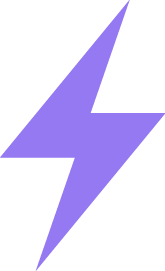

Running local mode, some functionality limited.



In [2]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [3]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [4]:
northamerica = pd.read_csv('northamericacomplete.csv')

In [5]:
df = northamerica[['Name','State/Estado/Province','Country', 'Longitude', 'Latitude','Population']]
df = df.dropna()
df['Longitude'] = df['Longitude'] * -1

In [6]:
df.head()

,Name,State/Estado/Province,Country,Longitude,Latitude,Population
0,St. John's,Newfoundland and Labrador,Canada,-52.700,47.550,205955
1,Conception Bay South,Newfoundland and Labrador,Canada,-53.000,47.500,26199
2,Cape Breton,Nova Scotia,Canada,-60.750,46.150,98722
3,Charlottetown,Prince Edward Island,Canada,-63.100,46.250,69325
4,Halifax,Nova Scotia,Canada,-63.506,44.515,403390


In [7]:
df = df[df['Country'] == 'United States']

In [8]:
X = df[['Longitude', 'Latitude']]
x = df['Longitude']
y = df['Latitude']
labels = df['Name']
lgn.scatter(x, y, labels = df['Name'])

Silhouette Coefficient: 0.096
Estimated number of clusters: 7
Homogeneity: 0.097
Completeness: 0.987
V-measure: 0.177
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True

/home/matthew/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


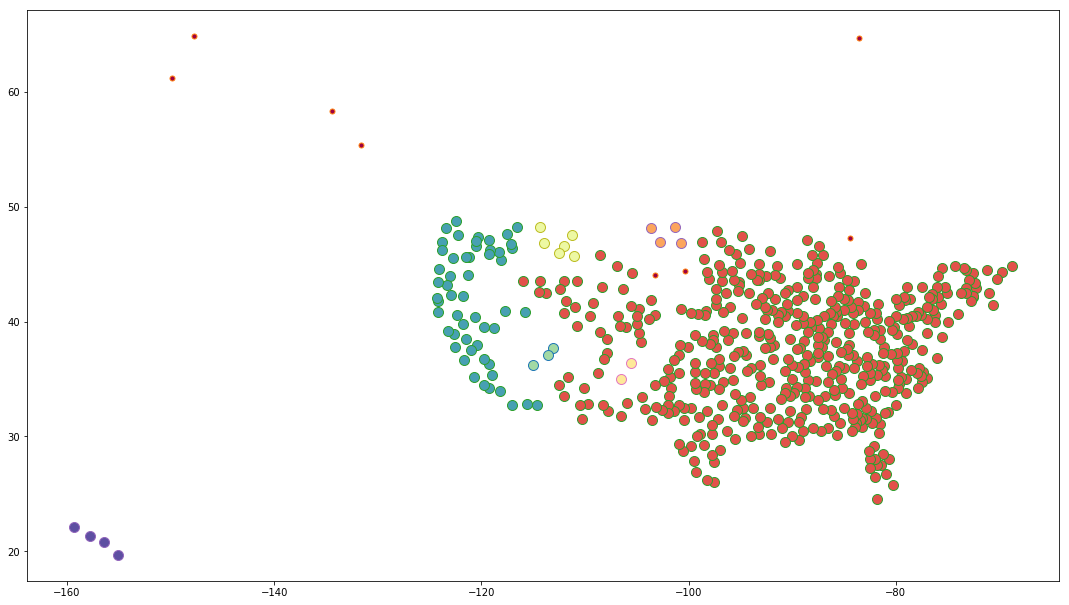

In [9]:
# 2 is the equivalent of 190 km, which is less than 1.5 hours on a high speed train.
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.617
Estimated number of clusters: 2
Homogeneity: 0.016
Completeness: 1.000
V-measure: 0.031
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True

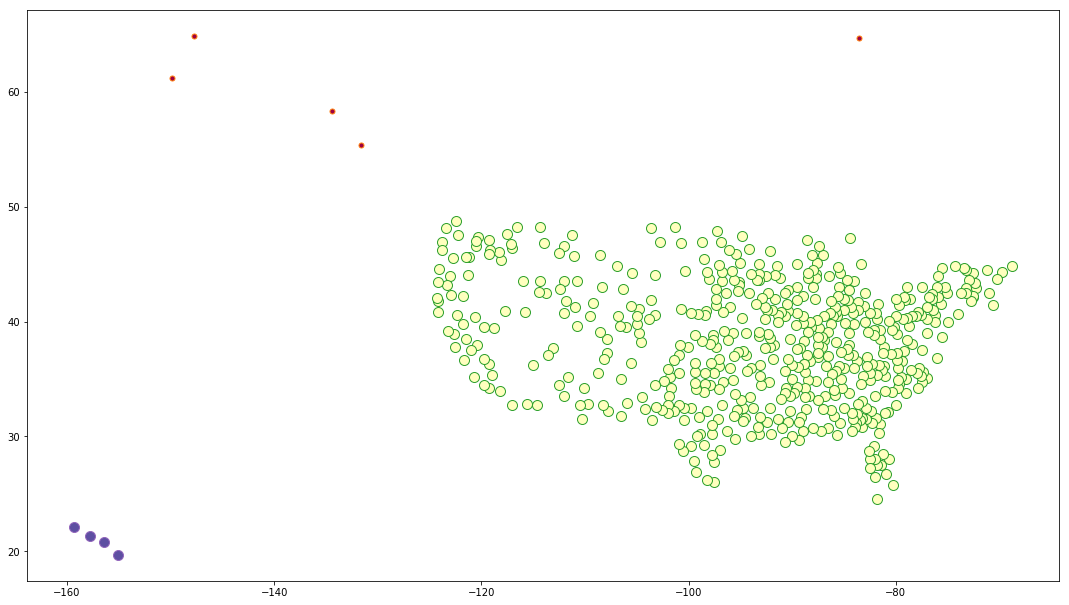

In [10]:
# 2 is the equivalent of 190 km, which is less than 1.5 hours on a high speed train.
dbscanner(y, x, 3, 2)

In [11]:
largecities = df.loc[df['Population'] >= 500000]
largecities.shape

(104, 6)

In [12]:
X = largecities[['Longitude', 'Latitude']]
x = largecities['Longitude']
y = largecities['Latitude']
labels = largecities['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: 0.159
Estimated number of clusters: 10
Homogeneity: 0.436
Completeness: 0.930
V-measure: 0.594
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False False  True  True  True False False False False
 False  True False False False  True  True  True  True  True  True  True
 False False  True  True False False False  True False  True  True  True
  True False  True  True False  True False False]


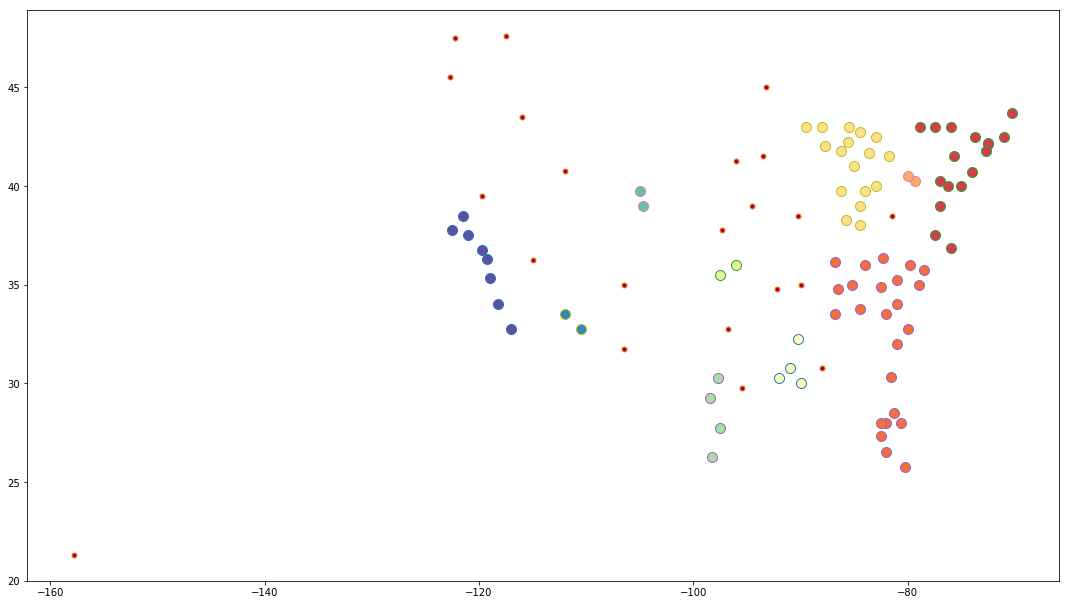

In [13]:
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.396
Estimated number of clusters: 6
Homogeneity: 0.193
Completeness: 0.984
V-measure: 0.323
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True  True  True  True  True  True  True False]


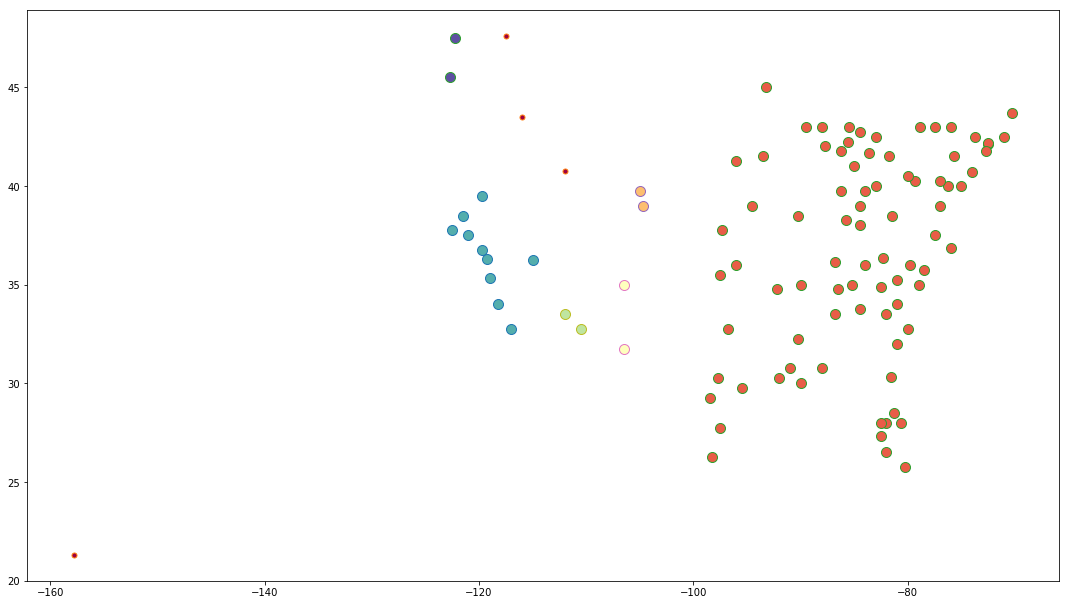

In [14]:
dbscanner(y, x, 4, 2)

In [15]:
million = df.loc[df['Population'] >= 1000000]

In [16]:
X = million[['Longitude', 'Latitude']]
x = million['Longitude']
y = million['Latitude']
labels = million['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: 0.103
Estimated number of clusters: 12
Homogeneity: 0.532
Completeness: 0.946
V-measure: 0.681
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True  True  True  True  True  True
  True False  True False  True  True False False  True  True False False
 False False False False  True False  True  True  True False False False
  True  True False False  True  True False  True False  True False]


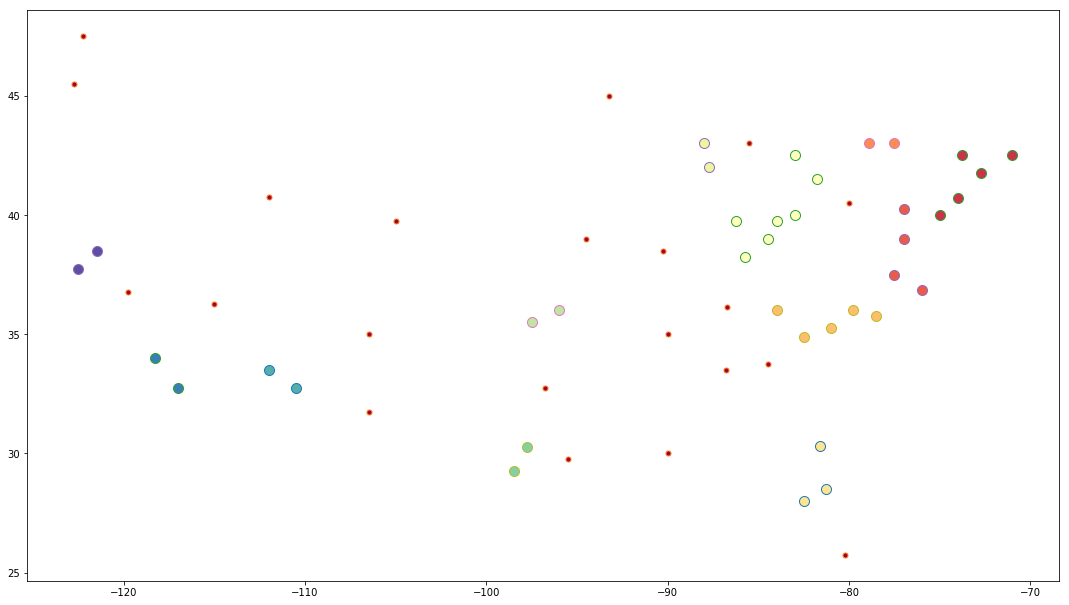

In [17]:
# 2 with dbscanner is the equivalent of 190 km, less than a 1 hour ride on a high speed train.
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.341
Estimated number of clusters: 7
Homogeneity: 0.377
Completeness: 0.954
V-measure: 0.540
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True  True  True  True]


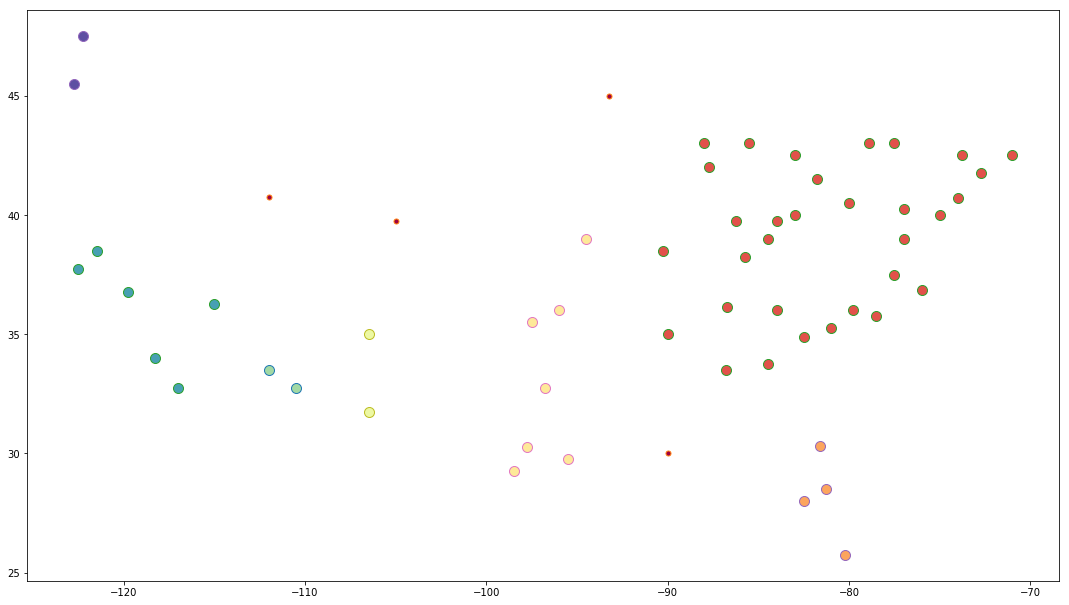

In [18]:
# 4 with dbscanner is the equivalent of 380 km, less than 2 hours on a high speed train.
dbscanner(y, x, 4, 2)

Silhouette Coefficient: 0.559
Estimated number of clusters: 3
Homogeneity: 0.167
Completeness: 1.000
V-measure: 0.286
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


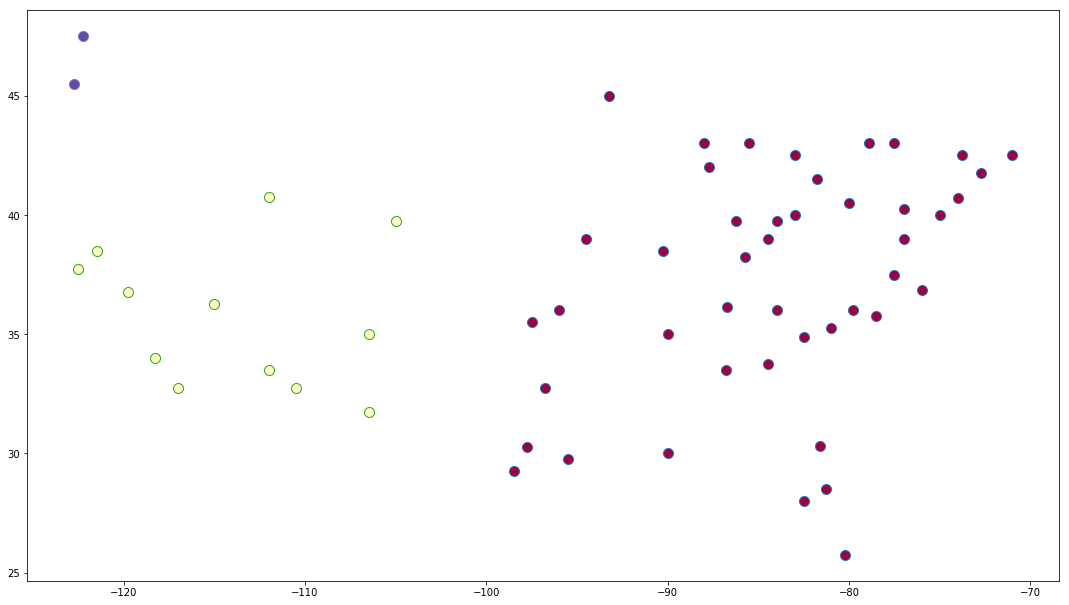

In [19]:
# 6 with dbscanner is the equivalent of 570 km, less than 3 hours on a high speed train.
dbscanner(y, x, 6, 2)

In [20]:
million['Population'].sum() * 100 / 320000000

65L

In [21]:
million = df.loc[df['Population'] >= 2350000]
million['Population'].sum() * 100 / 320000000

50L

In [22]:
X = million[['Longitude', 'Latitude']]
x = million['Longitude']
y = million['Latitude']
labels = million['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: -0.051
Estimated number of clusters: 5
Homogeneity: 0.387
Completeness: 1.000
V-measure: 0.558
[False  True  True False False False False  True  True  True  True False
 False False False False False False False False False  True  True  True
 False  True False]


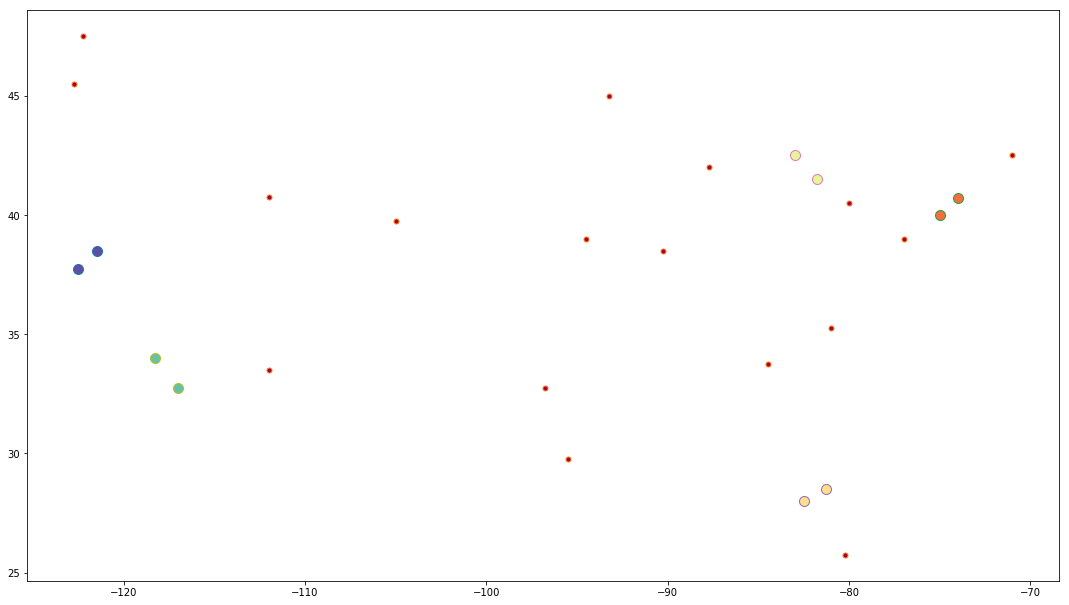

In [23]:
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.356
Estimated number of clusters: 7
Homogeneity: 0.588
Completeness: 1.000
V-measure: 0.741
[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False  True  True False False False  True  True  True
  True  True  True]


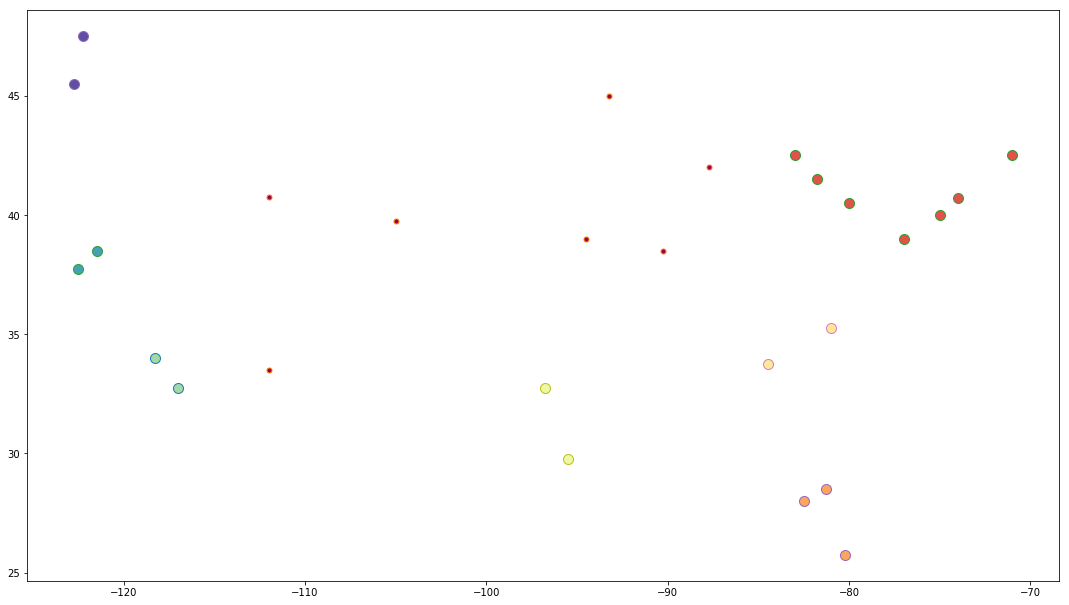

In [24]:
# 4 with dbscanner is the equivalent of 380 km, between 1 and 2 hours on a high speed train.
dbscanner(y, x, 4, 2)

Silhouette Coefficient: 0.368
Estimated number of clusters: 5
Homogeneity: 0.461
Completeness: 0.967
V-measure: 0.624
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True False  True  True  True
  True  True  True]


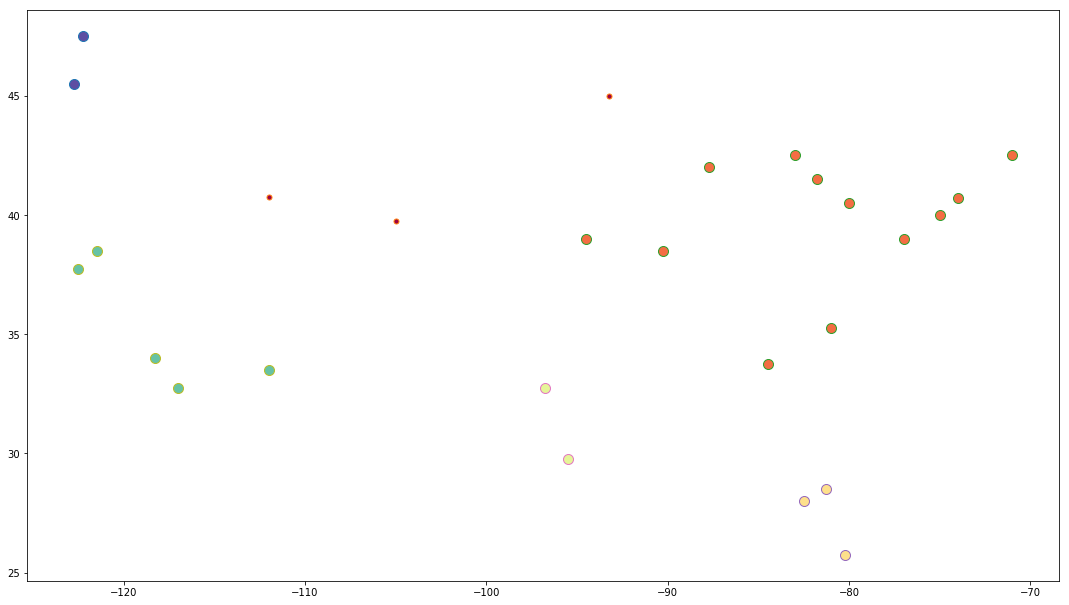

In [25]:
# 6 with dbscanner is the equivalent of 570 km, under 3 hours on a high speed train.
dbscanner(y, x, 6, 2)

Silhouette Coefficient: 0.356
Estimated number of clusters: 7
Homogeneity: 0.568
Completeness: 0.919
V-measure: 0.702
[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False  True  True False False False  True  True  True
  True  True  True]


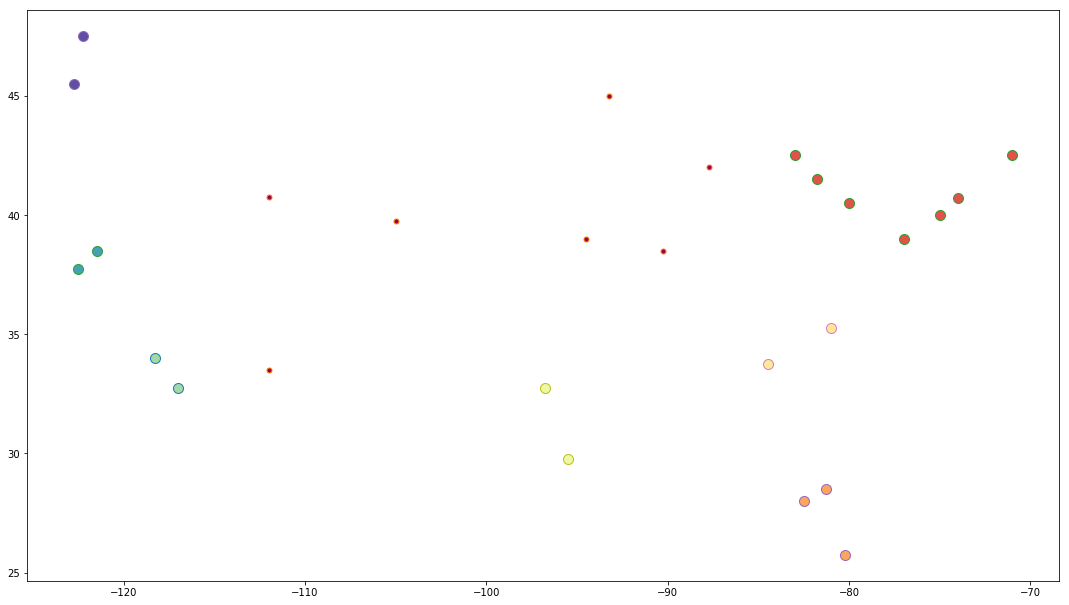

In [27]:
dbscanner(x, y, 4, 2)

Silhouette Coefficient: 0.368
Estimated number of clusters: 5
Homogeneity: 0.467
Completeness: 0.934
V-measure: 0.623
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True False  True  True  True
  True  True  True]


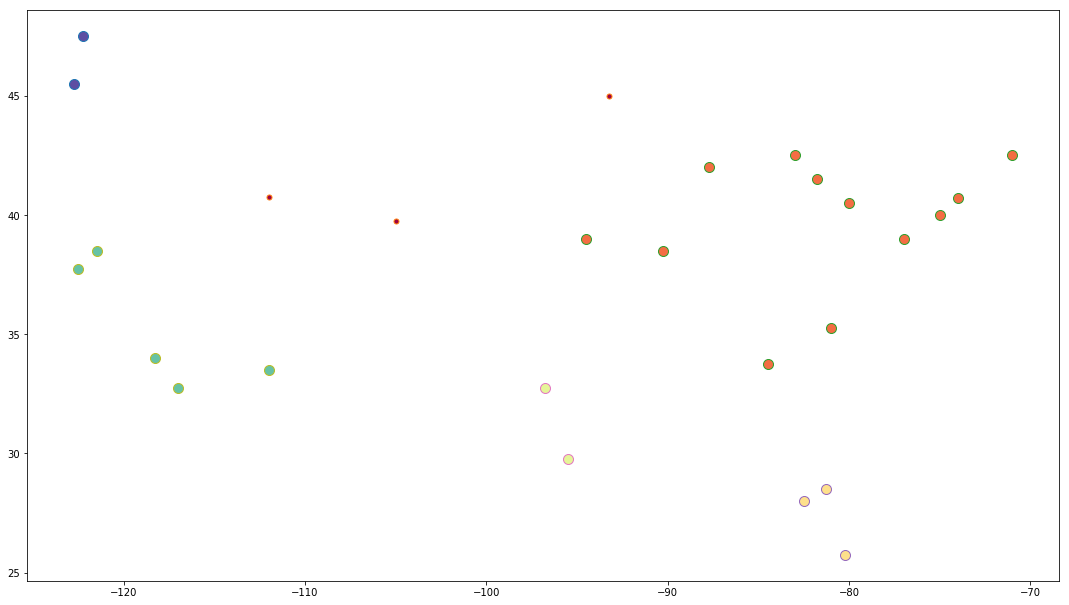

In [28]:
dbscanner(x, y, 6, 2)

In [31]:
usa = df.loc[df['Population'] >= 500000]

In [32]:
X = usa[['Longitude', 'Latitude']]
x = usa['Longitude']
y = usa['Latitude']
labels = usa['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: 0.159
Estimated number of clusters: 10
Homogeneity: 0.436
Completeness: 0.930
V-measure: 0.594
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False False  True  True  True False False False False
 False  True False False False  True  True  True  True  True  True  True
 False False  True  True False False False  True False  True  True  True
  True False  True  True False  True False False]


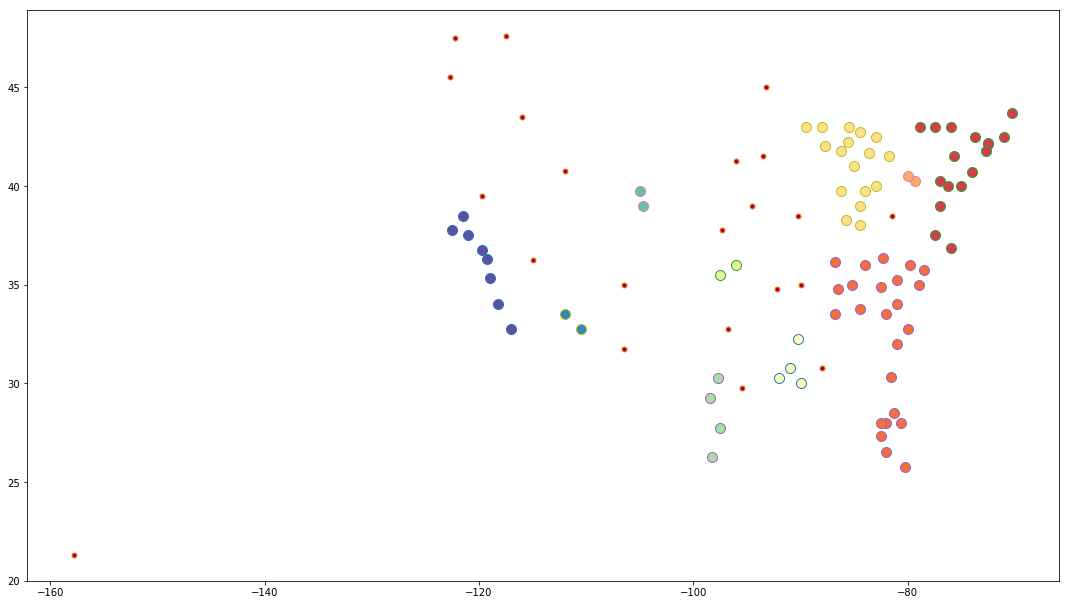

In [33]:
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.396
Estimated number of clusters: 6
Homogeneity: 0.193
Completeness: 0.984
V-measure: 0.323
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True  True  True  True  True  True  True False]


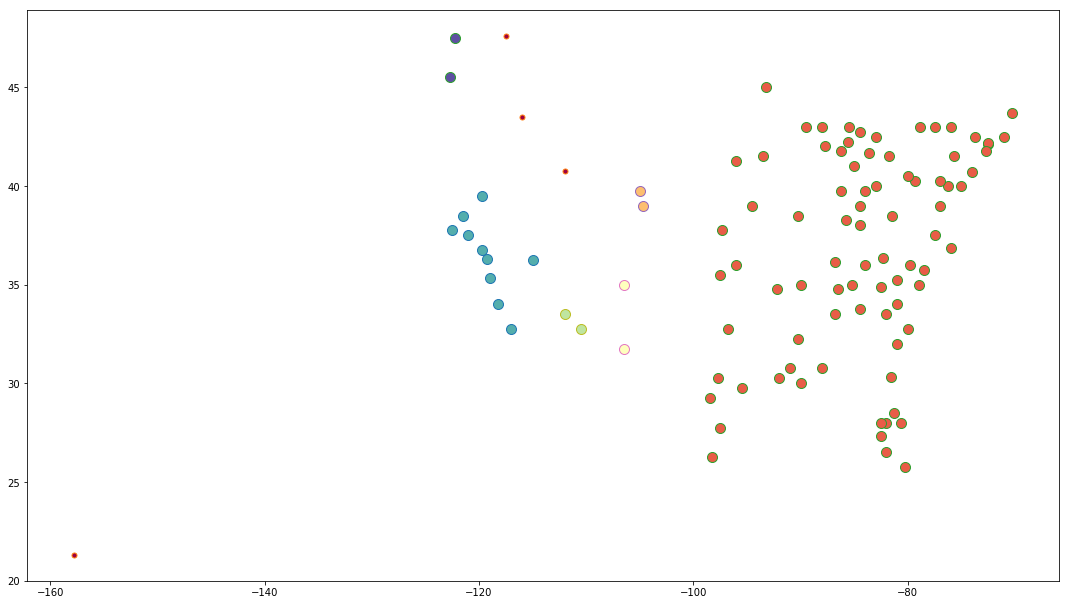

In [34]:
dbscanner(y, x, 4, 2)

In [35]:
usa.shape

(104, 6)